# Projet 2 :  Chatbot Covid-19 

Cette partie du projet a pour objectif de réaliser un Chatbot prenant la forme d'interrogatoire médicale 
et qui a pour  fonction d'aider les médecins à prendre des décisions plus rapidement.

- Les données de l'interrogatoire servent à identifier si une personne est atteinte de la covd-19 ou pas en s'appuyant sur certains symptômes prédéfinis par l'OMS.

- Ces symptômes sont basés  conjointement sur les directives données par l'Organisation mondiale de la santé (OMS) le ministère de la Santé.


Les symptomes : 

- L'ensemble de données contient sept variables principales qui auront un impact sur le fait qu'une personne soit atteinte ou non d'une maladie du coronavirus,

- la description de chaque variable est la suivante: 

    - Pays: Liste des pays visités.
    - Âge: Classification du groupe d'âge pour chaque personne, sur la base des symptômes standard du groupe d'âge            de l'OMS : selon l'OMS, 5 sont les principaux symptômes du COVID-19, 
                - fièvre, 
                - fatigue,  
                - difficulté à respirer, 
                - toux sèche 
                mauxde gorge.

                - Outre ces premiers symptomes, d'autres peuvent etre considées tels que :
                    - douleurs, 
                    - congestion nasale, 
                    - écoulement nasal, 
                    - diarrhée et autres.
            
            
    - Gravité: Le niveau de gravité, 
           - léger, 
           - modéré, 
           - sévère

    - Contact: la personne a-t-elle contacté un autre patient COVID-19



Cette liste est évolutive et vous pouvez la compléter par de nouveaux symptomes nouvellement reconnus comme tels par les autorités compétentes. 

Avec toutes ces variables catégorielles, une combinaison pour chaque étiquette de la variable sera générée et donc, au total, 316800 combinaisons sont créées.


Les Données: deux fichiers CSV sont sont sur moodle,

    1.	Données brutes: ce fichier contient toutes les étiquettes possibles des variables, ce fichier est utilisé pour générer les données nettoyées.
    
    2.Cleaned-Data: Ce fichier contient toutes les combinaisons possibles de données de Raw-Data.csv, peut être     utilisé pour l'analyse.
   
        1.	Apprentissage supervisé (classification)
        2.	Apprentissage non supervisé (clustering)


IL est recommandé d'effectuer un travail d'extraction et de recuil de données. IL est vous est donc possible de  compléter le jeu de données proposé ou de considérer un autre remplissant le même objectif. Tout choix de jeu de donné doit être justifié. Un jeu de donné mal choisi vous conduirait à un maivais apprentissage.


Example de prédiction :

https://coronavirus.heallify.com/
https://www.kaggle.com/iamhungundji/covid19-symptoms-checker

NB : Avis de non-responsabilité: Les résultats ou l'analyse de ces données doivent être considérés comme des conseils médicaux.


In [24]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Covid Data.csv")

In [34]:
df = df.loc[~df.drop("AGE", axis=1).isin([97,99]).any(axis=1)]


In [36]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,2,1,2,2,2,2,2,3,1
56,2,1,1,2,9999-99-99,1,1,58,2,2,...,2,2,1,2,1,1,2,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,1,13,1,2,9999-99-99,2,2,79,2,2,...,2,2,1,2,2,2,2,2,7,2
1048553,2,13,1,2,9999-99-99,2,1,61,2,1,...,2,2,1,2,2,2,2,2,7,2
1048554,2,13,1,2,9999-99-99,2,1,63,2,2,...,1,2,2,2,2,1,2,2,7,2
1048567,1,13,1,2,9999-99-99,2,2,23,2,1,...,2,2,2,2,2,1,2,2,7,2


In [37]:
print("Rows : ", df.shape[0])
#Vérife de valeurs nul 
display("Valeurs null ", df.isnull().sum())

Rows :  78175


'Valeurs null '

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [29]:
matrice = df.corr()
df.corr()

C:\Users\Guillaume\AppData\Local\Temp\ipykernel_1460\2306640103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = df.corr()
C:\Users\Guillaume\AppData\Local\Temp\ipykernel_1460\2306640103.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


<Axes: >

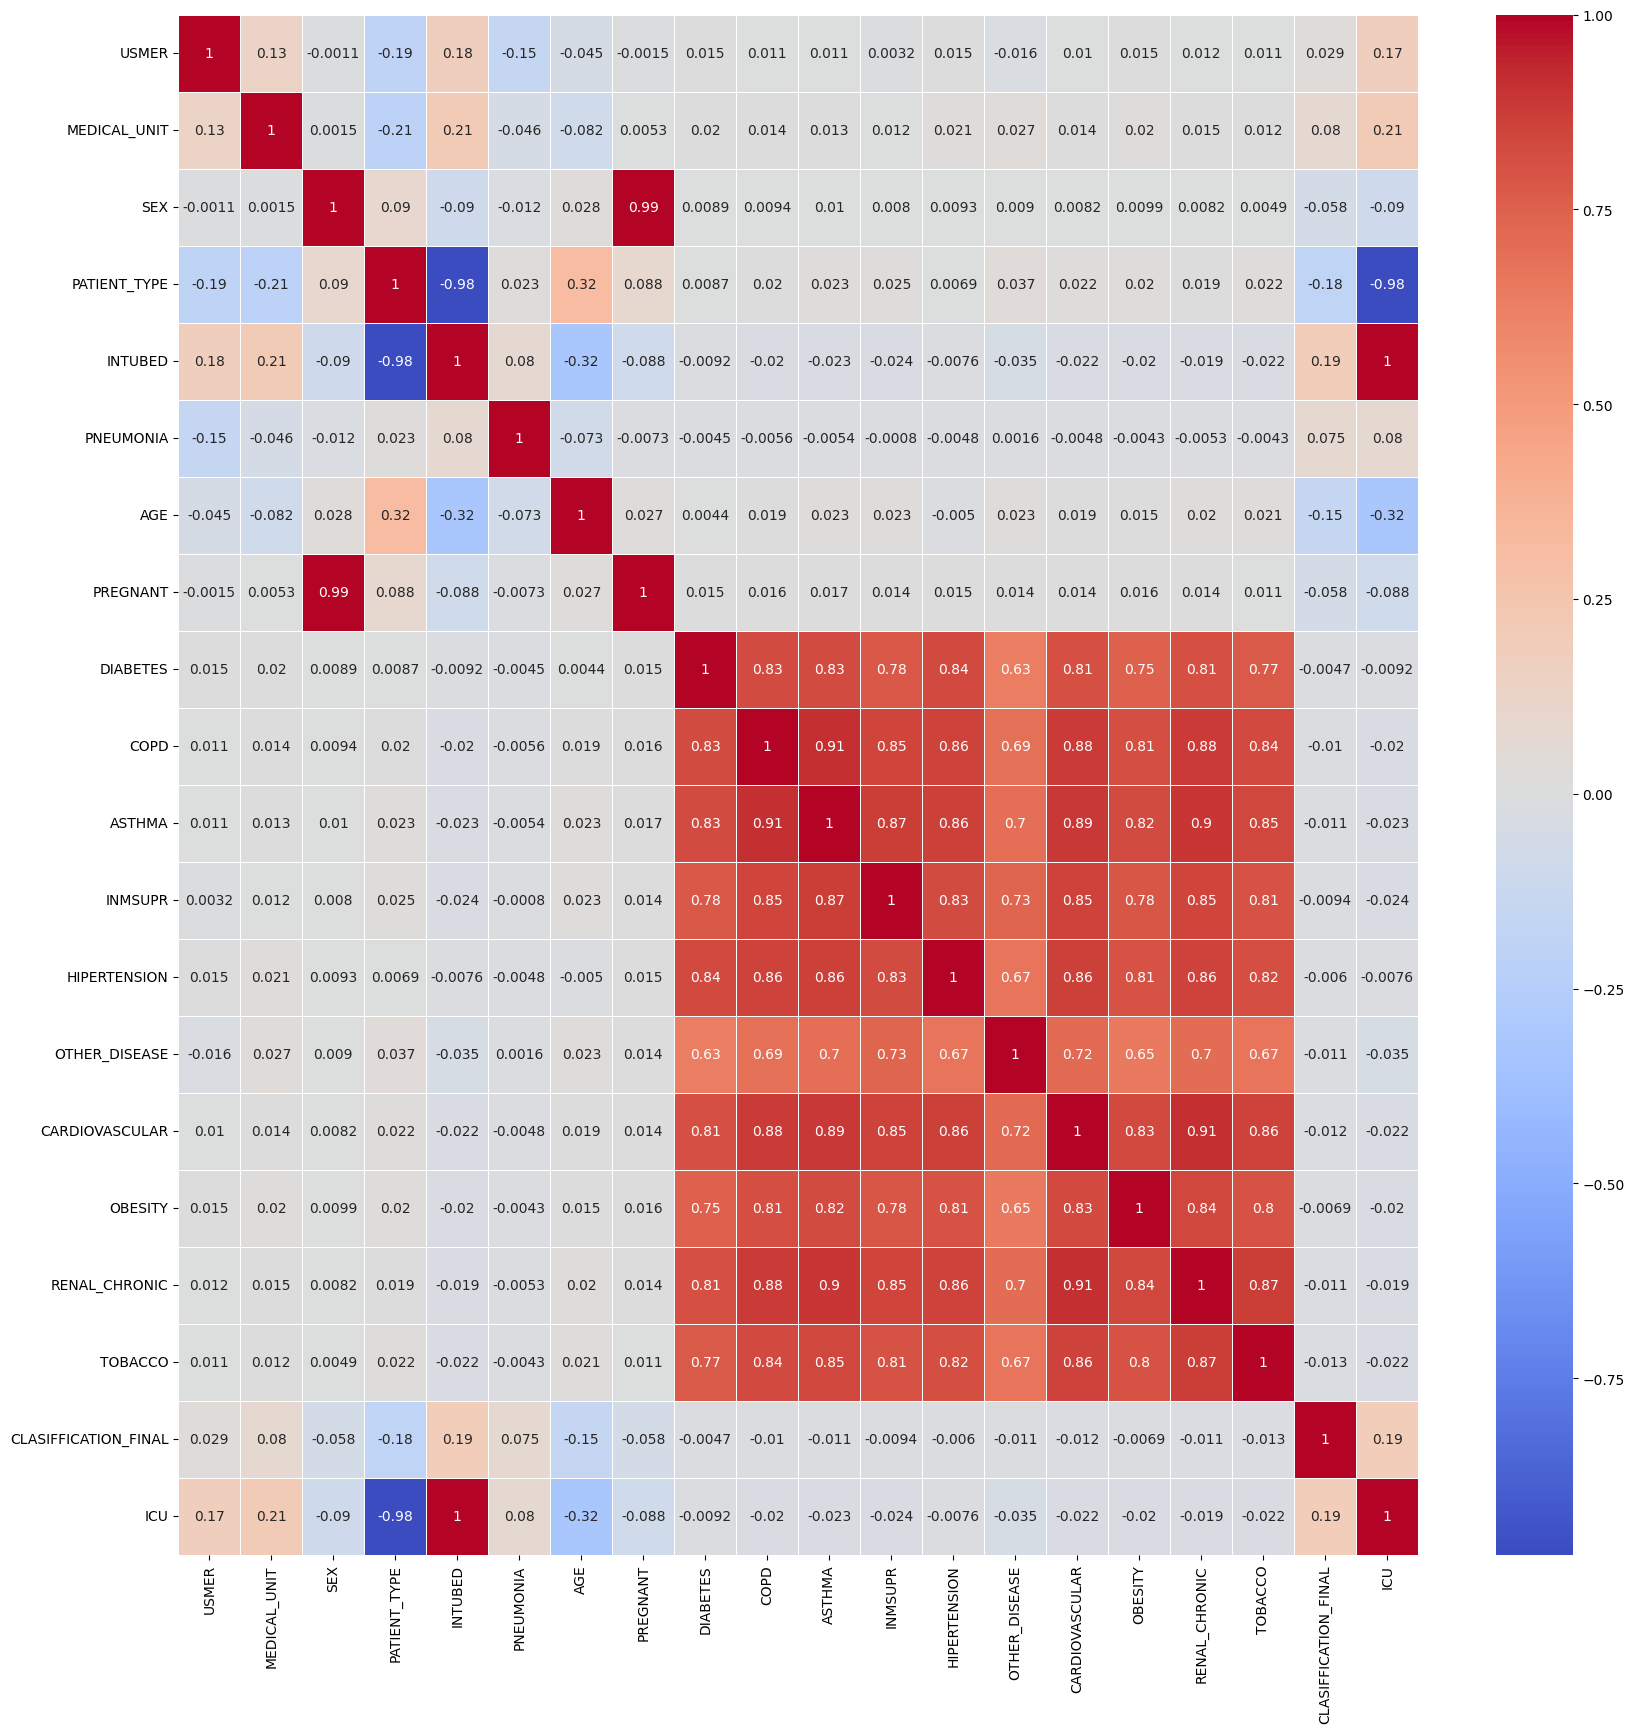

In [38]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(matrice, annot=True, cmap="coolwarm", linewidths=.5, ax=ax)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

#le = LabelEncoder()
#df['DATE_DIED'] = le.fit_transform(df['DATE_DIED'])

X = df.drop(['CLASIFFICATION_FINAL', 'DATE_DIED'], axis=1)
y = df['CLASIFFICATION_FINAL']

In [40]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#instanciation
model_tree = DecisionTreeClassifier()
#training
model_tree.fit(X_train, y_train)

model_tree.predict(X_test)
print("Précision : ", model_tree.score( X_test, y_test))

Précision :  0.5262551966741286


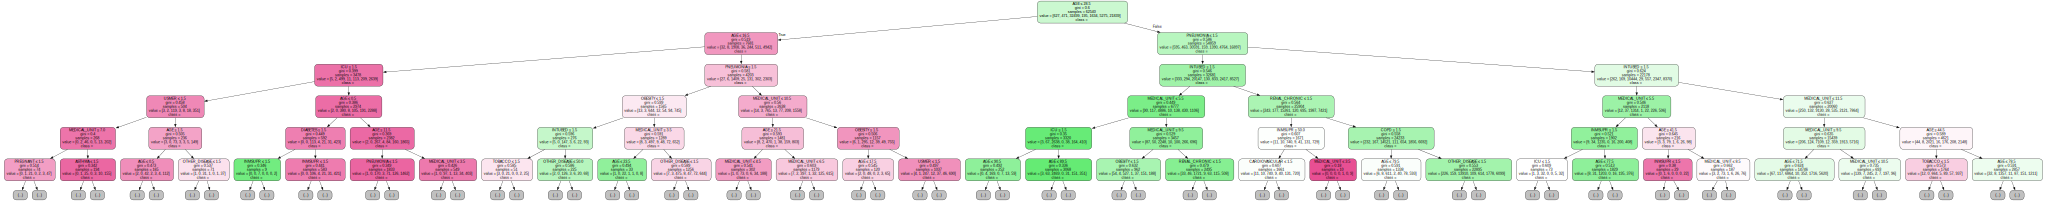

In [41]:
from sklearn import tree
import graphviz

target = list(str(df['CLASIFFICATION_FINAL'].unique()))
feature_names = list(X_train.columns)

dot_data = tree.export_graphviz(model_tree, out_file=None,
                                class_names=target,
                                feature_names=feature_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=5)
graph = graphviz.Source(dot_data)
graph